In [17]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/sudiy/OneDrive/Desktop/Big_data_Assignment corn_data set.csv")  # Change to your actual file path

# Convert OB_DT to datetime
df["OB_DT"] = pd.to_datetime(df["OB_DT"])

# Sort by date (important for time series)
df = df.sort_values("OB_DT")

# Display first few rows
print(df.head())

       OB_DT     PMAIZMT
0 1990-01-01  105.900513
1 1990-02-01  106.294167
2 1990-03-01  109.837318
3 1990-04-01  118.498337
4 1990-05-01  121.254097


In [31]:
df["Median_10"] = df["PMAIZMT"].rolling(window=10).median()

# Drop NaN values caused by rolling median calculation
df.dropna(inplace=True)

# Check the dataframe again
print(df.head(25))


        OB_DT     PMAIZMT   Median_20   Median_10
18 1991-07-01  105.729897  105.618355  105.618355
19 1991-08-01  110.118813  105.732529  105.732529
20 1991-09-01  108.853127  106.014664  106.014664
21 1991-10-01  109.523323  107.573647  107.573647
22 1991-11-01  106.797867  107.825497  107.825497
23 1991-12-01  106.720680  107.825497  107.825497
24 1992-01-01  109.586357  107.825497  107.825497
25 1992-02-01  113.921257  107.825497  107.825497
26 1992-03-01  116.684593  109.188225  109.188225
27 1992-04-01  109.055138  109.289230  109.289230
28 1992-05-01  109.177910  109.350616  109.350616
29 1992-06-01  110.201927  109.350616  109.350616
30 1992-07-01  102.394058  109.350616  109.350616
31 1992-08-01   97.539932  109.116524  109.116524
32 1992-09-01   98.216675  109.116524  109.116524
33 1992-10-01   94.559769  109.116524  109.116524
34 1992-11-01   95.172661  105.724598  105.724598
35 1992-12-01   94.043419  100.305367  100.305367
36 1993-01-01   94.095215   97.878304   97.878304


In [33]:
X = df.drop(columns=["PMAIZMT", "OB_DT"])  # Features: Year, Month, Median_20
y = df["PMAIZMT"]  # Target: Corn Price

# Train-Test Split (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check shapes
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (323, 2), Testing data: (81, 2)


In [35]:
import xgboost as xgb

# Initialize XGBoost Model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train Model
model.fit(X_train, y_train)

# Predict on Test Data
y_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")  # Closer to 1 = better


Mean Absolute Error (MAE): 27.12
Root Mean Squared Error (RMSE): 34.88
R² Score: 0.6489


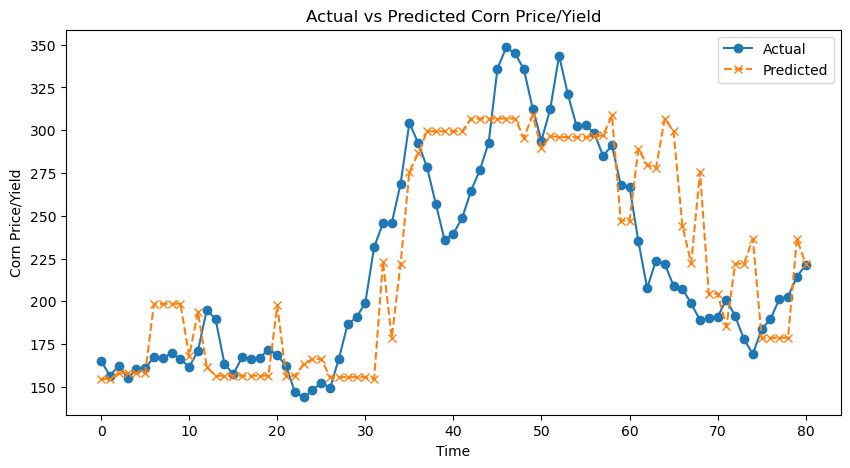

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", marker="o")
plt.plot(y_pred, label="Predicted", marker="x", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Corn Price/Yield")
plt.title("Actual vs Predicted Corn Price/Yield")
plt.legend()
plt.show()